In [73]:
import pandas as pd
from sklearn import datasets
data=datasets.load_iris()

In [74]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [75]:
x=pd.DataFrame(data=data.data,columns=data.feature_names)
y=pd.Series(data=data.target)

In [76]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [77]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [79]:
print(x_train.shape)
print(x_train.size)
x_train.head()

(120, 4)
480


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
17,5.1,3.5,1.4,0.3
81,5.5,2.4,3.7,1.0
103,6.3,2.9,5.6,1.8
33,5.5,4.2,1.4,0.2
101,5.8,2.7,5.1,1.9


In [80]:
print(y_train.shape)
print(y_train.size)
y_train.head()

(120,)
120


17     0
81     1
103    2
33     0
101    2
dtype: int32

In [81]:
print(x_test.shape)
print(x_test.size)
x_test.head()

(30, 4)
120


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
146,6.3,2.5,5.0,1.9
38,4.4,3.0,1.3,0.2
99,5.7,2.8,4.1,1.3
143,6.8,3.2,5.9,2.3


In [82]:
print(y_test.shape)
print(y_test.size)
y_test.head()

(30,)
30


40     0
146    2
38     0
99     1
143    2
dtype: int32

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
cls=knn.fit(x_train,y_train)
cls

KNeighborsClassifier(n_neighbors=7)

In [84]:
cls.score(x_test,y_test)

0.9666666666666667

In [92]:
y_pred=cls.predict(x_test)
y_pred

array([0, 2, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 2, 2, 1, 0, 0])

In [85]:
error_rate=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    error_rate.append(np.mean(pred!=y_test))

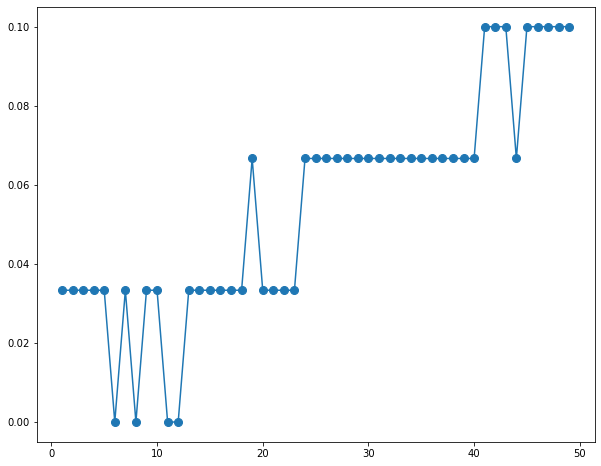

In [86]:
pt.figure(figsize=(10,8))
pt.plot(range(1,50),error_rate,marker='o',markersize=8)

In [93]:
import seaborn as sn
from sklearn import metrics
print(metrics.classification_report(cls.predict(x_test),y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94         8
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [94]:
metrics.confusion_matrix(cls.predict(x_test),y_test)

array([[12,  0,  0],
       [ 0,  8,  0],
       [ 0,  1,  9]], dtype=int64)

<AxesSubplot:>

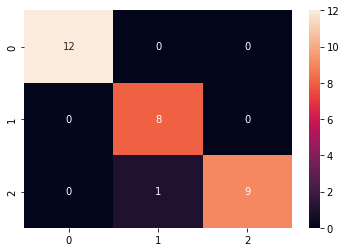

In [95]:
cm=metrics.confusion_matrix(cls.predict(x_test),y_test)
sn.heatmap(cm,annot=True)

In [96]:
metrics.accuracy_score(cls.predict(x_test),y_test)

0.9666666666666667

In [99]:
metrics.precision_score(cls.predict(x_test),y_test,average='macro')

0.9629629629629629

In [100]:
metrics.recall_score(cls.predict(x_test),y_test,average='micro')

0.9666666666666667

In [101]:
metrics.f1_score(cls.predict(x_test),y_test,average='macro')

0.9628482972136223

In [102]:
metrics.mean_squared_error(cls.predict(x_test),y_test)

0.03333333333333333

In [103]:
metrics.mean_absolute_error(cls.predict(x_test),y_test)

0.03333333333333333

In [104]:
metrics.r2_score(cls.predict(x_test),y_test)

0.9542682926829268

In [105]:
#root mean square error
import math
import numpy as np
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE=math.sqrt(MSE)
RMSE

0.18257418583505536

In [106]:
#Adjusted R2 score
import numpy as np
r2_score=metrics.r2_score(y_test,y_pred)
n=y_test.shape[0]
p=3
x=(1-r2_score)
y=(n-1)/(n-p-1)
adj_r2=(1-(x*y))
print('Adjusted_R2:',adj_r2)

Adjusted_R2: 0.94611668524712


In [107]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='accuracy')
scores

array([0.91666667, 0.83333333, 0.75      , 0.91666667, 0.91666667,
       1.        , 1.        , 0.91666667, 1.        , 0.91666667])

In [108]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.15)


In [109]:
scores.mean()

0.9166666666666666

In [110]:
scores.std()*2

0.14907119849998596

In [111]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='r2')
scores

array([0.875     , 0.75      , 0.625     , 0.875     , 0.875     ,
       1.        , 1.        , 0.875     , 1.        , 0.86956522])

In [112]:
scores.mean()

0.8744565217391305

In [113]:
scores.std()*2

0.22363057320125387

In [117]:
from sklearn.model_selection import GridSearchCV
rand_cv=GridSearchCV(knn,param_grid={'n_neighbors':[3,27,29]},scoring='accuracy')

In [118]:
rand_cv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=49),
             param_grid={'n_neighbors': [3, 27, 29]}, scoring='accuracy')

In [119]:
rand_cv.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [120]:
rand_cv.best_index_

0

In [121]:
rand_cv.best_params_

{'n_neighbors': 3}

In [122]:
rand_cv.best_score_

0.975

In [123]:
rand_cv.cv_results_

{'mean_fit_time': array([0.00200405, 0.00159898, 0.00162024]),
 'std_fit_time': array([0.00063959, 0.00048923, 0.00047768]),
 'mean_score_time': array([0.00299492, 0.00220542, 0.00219278]),
 'std_score_time': array([0.00061032, 0.00039685, 0.00098831]),
 'param_n_neighbors': masked_array(data=[3, 27, 29],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3}, {'n_neighbors': 27}, {'n_neighbors': 29}],
 'split0_test_score': array([1., 1., 1.]),
 'split1_test_score': array([0.91666667, 0.91666667, 0.875     ]),
 'split2_test_score': array([1.        , 0.95833333, 1.        ]),
 'split3_test_score': array([0.95833333, 0.95833333, 0.95833333]),
 'split4_test_score': array([1.        , 1.        , 0.95833333]),
 'mean_test_score': array([0.975     , 0.96666667, 0.95833333]),
 'std_test_score': array([0.03333333, 0.03118048, 0.04564355]),
 'rank_test_score': array([1, 2, 3])}

In [125]:
result=pd.DataFrame(rand_cv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002004,0.000640,0.002995,0.000610,3,{'n_neighbors': 3},1.0,0.916667,1.000000,0.958333,1.000000,0.975000,0.033333,1
1,0.001599,0.000489,0.002205,0.000397,27,{'n_neighbors': 27},1.0,0.916667,0.958333,0.958333,1.000000,0.966667,0.031180,2
2,0.001620,0.000478,0.002193,0.000988,29,{'n_neighbors': 29},1.0,0.875000,1.000000,0.958333,0.958333,0.958333,0.045644,3
